In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_convergence = pd.read_csv('EfficientNetb2_NormalTumor/convergence.csv')

In [3]:
df_convergence.head()

,epoch,metric,value
0,1,loss,4.109675
1,1,error,0.545455
2,1,fpr,0.666667
3,1,fnr,0.400000
4,2,loss,0.613093


In [4]:
df_loss = df_convergence[df_convergence['metric'] == 'loss' ]

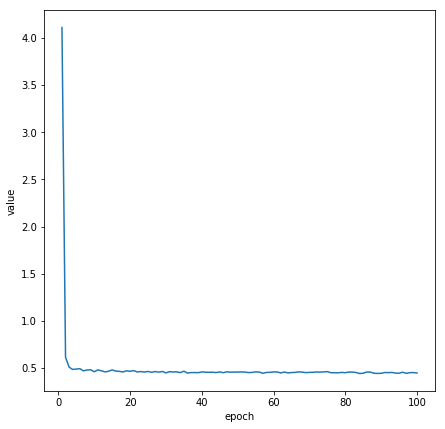

In [9]:
f, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(x=df_loss['epoch'], y=df_loss['value'], hue=None, size=None, style=None, data=df_loss)

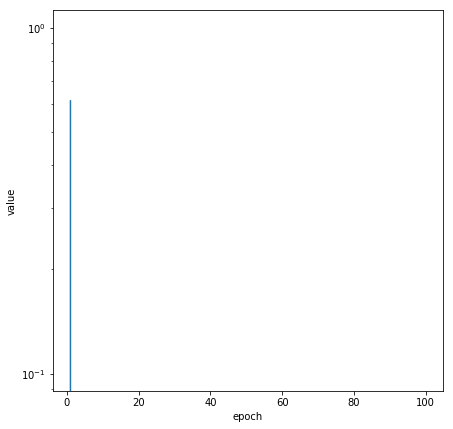

In [73]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
sns.lineplot(x=df_loss['epoch'], y=df_loss['value'], hue=None, size=None, style=None, data=df_loss)

In [10]:
df_error = df_convergence[df_convergence['metric'] == 'error' ]

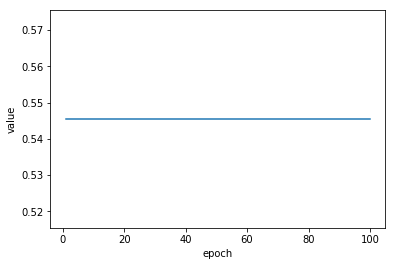

In [11]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [12]:
df_error = df_convergence[df_convergence['metric'] == 'fpr' ]

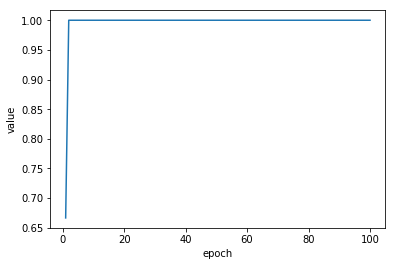

In [13]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [14]:
df_error = df_convergence[df_convergence['metric'] == 'fnr' ]

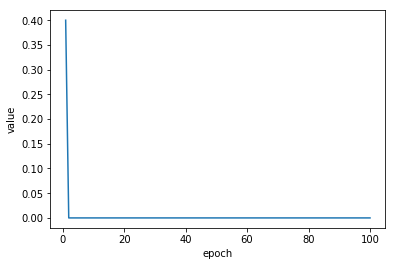

In [15]:
sns.lineplot(x=df_error['epoch'], y=df_error['value'], hue=None, size=None, style=None, data=df_error)

In [16]:
df_FPR_FNR = df_convergence[(df_convergence['metric'] == 'fpr') | (df_convergence['metric'] == 'fnr') ]

In [17]:
df_FPR_FNR.head()

,epoch,metric,value
2,1,fpr,0.666667
3,1,fnr,0.400000
6,2,fpr,1.000000
7,2,fnr,0.000000
10,3,fpr,1.000000


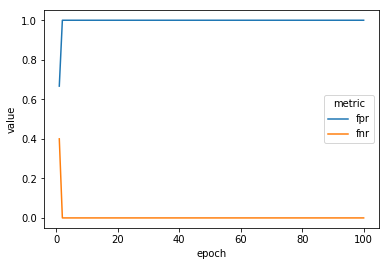

In [18]:
sns.lineplot(x=df_FPR_FNR['epoch'], y=df_FPR_FNR['value'], hue='metric', size=None, style=None, data=df_FPR_FNR)

In [14]:
### Show prediction 

In [98]:
df_proba_sample = pd.read_csv('EfficientNetb2_NormalTumor_TrainingInf/probability.csv')

In [99]:
df_proba_sample[df_proba_sample.index == 'TNE0075'].shape

(0, 3)

In [100]:
# Get the 5 tiles per slides with the highest_proba to be atypical
def tiles_highest_normal_scores(df_proba_sample):
    sample = set(df_proba_sample.index)
    dict_sample_tiles_scores = {}
    for s in sample:
        print('SAMPLE  ', s)
        dict_sample_tiles_scores[s] = []
        sub_df = df_proba_sample[df_proba_sample.index == s]
        sub_df = sub_df.sort_values(by=['probability'], ascending = False)
        top_tiles =  sub_df.iloc[:5, 0]
        top_scores  =  sub_df.iloc[:5, -1]
        dict_sample_tiles_scores[s].append({'TopTiles' : top_tiles })
        dict_sample_tiles_scores[s].append({'TopScores' : top_scores })
        dict_sample_tiles_scores[s].append({'Targets' : sub_df.iloc[0, 1] })
    return dict_sample_tiles_scores
        

In [101]:
dict_sample_tiles_scores_NORMAL  = tiles_highest_normal_scores(df_proba_sample)

SAMPLE   NL-65
SAMPLE   NL-24
SAMPLE   NL-67
SAMPLE   NL-14
SAMPLE   NL-84
SAMPLE   NL-107
SAMPLE   TNE0451
SAMPLE   TNE0986
SAMPLE   NL-100
SAMPLE   TNE0889
SAMPLE   NL-129
SAMPLE   NL-124
SAMPLE   NL-99
SAMPLE   NL-128
SAMPLE   NL-42
SAMPLE   NL-80
SAMPLE   NL-98
SAMPLE   TNE0067
SAMPLE   NL-61
SAMPLE   NL-46
SAMPLE   NL-56
SAMPLE   NL-77
SAMPLE   TNE0514
SAMPLE   TNE0567
SAMPLE   NL-52
SAMPLE   NL-21
SAMPLE   NL-6
SAMPLE   NL-59
SAMPLE   NL-101
SAMPLE   TNE0591
SAMPLE   NL-36
SAMPLE   NL-47
SAMPLE   NL-40
SAMPLE   NL-75
SAMPLE   NL-43
SAMPLE   NL-109
SAMPLE   TNE0963
SAMPLE   NL-13
SAMPLE   NL-55
SAMPLE   NL-38
SAMPLE   NL-97
SAMPLE   NL-34
SAMPLE   TNE0058
SAMPLE   NL-66
SAMPLE   NL-8
SAMPLE   NL-103
SAMPLE   NL-69
SAMPLE   TNE0980
SAMPLE   NL-82
SAMPLE   NL-45
SAMPLE   NL-31
SAMPLE   NL-130
SAMPLE   TNE0868
SAMPLE   NL-48
SAMPLE   TNE1435
SAMPLE   TNE0795
SAMPLE   NL-2
SAMPLE   NL-79
SAMPLE   NL-115
SAMPLE   NL-26
SAMPLE   NL-23
SAMPLE   NL-30
SAMPLE   NL-49
SAMPLE   NL-25
SAMPLE 

In [102]:
dict_sample_tiles_scores_NORMAL

{'NL-65': [{'TopTiles': NL-65    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-65    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-65    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-65    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-65    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': NL-65    0.827235
   NL-65    0.796482
   NL-65    0.762050
   NL-65    0.734271
   NL-65    0.686988
   Name: probability, dtype: float64},
  {'Targets': 1}],
 'NL-24': [{'TopTiles': NL-24    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-24    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-24    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-24    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-24    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': NL-24    0.909993
   NL-24    0.855664
   NL-24    0.827235
   NL-24    0.825253
 

In [103]:
# Get the 5 tiles per slides with the highest_proba to be atypical
def tiles_highest_tumor_scores(df_proba_sample):
    sample = set(df_proba_sample.index)
    dict_sample_tiles_scores = {}
    for s in sample:
        print('SAMPLE  ', s)
        dict_sample_tiles_scores[s] = []
        sub_df = df_proba_sample[df_proba_sample.index == s]
        sub_df = sub_df.sort_values(by=['probability'], ascending = True)
        top_tiles =  sub_df.iloc[:5, 0]
        top_scores  =  sub_df.iloc[:5, -1]
        dict_sample_tiles_scores[s].append({'TopTiles' : top_tiles })
        dict_sample_tiles_scores[s].append({'TopScores' : top_scores })
        dict_sample_tiles_scores[s].append({'Targets' : sub_df.iloc[0, 1] })
    return dict_sample_tiles_scores
        

In [104]:
dict_sample_tiles_scores_TUMOR = tiles_highest_tumor_scores(df_proba_sample)

SAMPLE   NL-65
SAMPLE   NL-24
SAMPLE   NL-67
SAMPLE   NL-14
SAMPLE   NL-84
SAMPLE   NL-107
SAMPLE   TNE0451
SAMPLE   TNE0986
SAMPLE   NL-100
SAMPLE   TNE0889
SAMPLE   NL-129
SAMPLE   NL-124
SAMPLE   NL-99
SAMPLE   NL-128
SAMPLE   NL-42
SAMPLE   NL-80
SAMPLE   NL-98
SAMPLE   TNE0067
SAMPLE   NL-61
SAMPLE   NL-46
SAMPLE   NL-56
SAMPLE   NL-77
SAMPLE   TNE0514
SAMPLE   TNE0567
SAMPLE   NL-52
SAMPLE   NL-21
SAMPLE   NL-6
SAMPLE   NL-59
SAMPLE   NL-101
SAMPLE   TNE0591
SAMPLE   NL-36
SAMPLE   NL-47
SAMPLE   NL-40
SAMPLE   NL-75
SAMPLE   NL-43
SAMPLE   NL-109
SAMPLE   TNE0963
SAMPLE   NL-13
SAMPLE   NL-55
SAMPLE   NL-38
SAMPLE   NL-97
SAMPLE   NL-34
SAMPLE   TNE0058
SAMPLE   NL-66
SAMPLE   NL-8
SAMPLE   NL-103
SAMPLE   NL-69
SAMPLE   TNE0980
SAMPLE   NL-82
SAMPLE   NL-45
SAMPLE   NL-31
SAMPLE   NL-130
SAMPLE   TNE0868
SAMPLE   NL-48
SAMPLE   TNE1435
SAMPLE   TNE0795
SAMPLE   NL-2
SAMPLE   NL-79
SAMPLE   NL-115
SAMPLE   NL-26
SAMPLE   NL-23
SAMPLE   NL-30
SAMPLE   NL-49
SAMPLE   NL-25
SAMPLE 

In [105]:
dict_sample_tiles_scores_TUMOR

{'NL-65': [{'TopTiles': NL-65    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-65    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-65    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-65    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-65    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': NL-65    0.647742
   NL-65    0.675584
   NL-65    0.686988
   NL-65    0.734271
   NL-65    0.762050
   Name: probability, dtype: float64},
  {'Targets': 1}],
 'NL-24': [{'TopTiles': NL-24    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-24    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-24    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-24    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   NL-24    /data/gcs/lungNENomics/work/MathianE/Tiles_512...
   Name: Tiles, dtype: object},
  {'TopScores': NL-24    0.459497
   NL-24    0.485157
   NL-24    0.496411
   NL-24    0.506084
 

In [106]:
import os
import shutil
def move_best__tiles(dict_sample_tiles_scores, outputdir, best_normal = True):
    try:
        os.mkdir(outputdir)
    except:
        print('Outputdir already created ')
    for sample in dict_sample_tiles_scores.keys():
        sample_info = dict_sample_tiles_scores[sample]
        target_sample =  sample_info[2]['Targets']
        try:
            os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample)))
        except:
            print('sample folder already created ')
        
        
        if best_normal:
            histo_type = 'Normal'
            try:
                os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample), histo_type))
            except:
                print('sample folder already created ')
        else:
            histo_type = 'Tumor'
            try:
                os.mkdir(os.path.join(outputdir,sample + '_'+ str(target_sample), histo_type))
            except:
                print('sample folder already created ')
            
        tiles = sample_info[0]['TopTiles']
        probs = sample_info[1]['TopScores']
        for tile, prob in zip(tiles, probs):
            tile_names = tile.split('/')[-1].split('.')[0]
            outputname = tile_names + '__' + str(round(prob*100)) + '.'+ tile.split('/')[-1].split('.')[1]
            print(outputname)
            shutil.copy(tile, os.path.join(outputdir ,sample + '_'+ str(target_sample), histo_type,outputname))


In [107]:
move_best__tiles(dict_sample_tiles_scores_NORMAL, 'BestSortTilesTumorNormal_EfficientB2_BS20_TrainingSet', best_normal = True)

NL-65_32341_5545__83.jpg
NL-65_35113_10165__80.jpg
NL-65_33265_7393__76.jpg
NL-65_47125_32341__73.jpg
NL-65_32341_6469__69.jpg
NL-24_41581_10165__91.jpg
NL-24_38809_9241__86.jpg
NL-24_41581_7393__83.jpg
NL-24_19405_8317__83.jpg
NL-24_35113_7393__82.jpg
NL-67_14785_12937__92.jpg
NL-67_20329_12013__91.jpg
NL-67_6469_24949__91.jpg
NL-67_22177_9241__90.jpg
NL-67_5545_25873__89.jpg
NL-14_36961_16633__91.jpg
NL-14_33265_8317__89.jpg
NL-14_34189_20329__88.jpg
NL-14_37885_21253__88.jpg
NL-14_43429_38809__87.jpg
NL-84_36037_38809__83.jpg
NL-84_41581_33265__80.jpg
NL-84_10165_6469__73.jpg
NL-84_42505_30493__69.jpg
NL-84_41581_32341__68.jpg
NL-107_36961_32341__91.jpg
NL-107_16633_8317__88.jpg
NL-107_48973_26797__87.jpg
NL-107_40657_30493__86.jpg
NL-107_48049_26797__85.jpg
TNE0451_42505_63295__96.jpg
TNE0451_30493_82237__95.jpg
TNE0451_106261_39733__95.jpg
TNE0451_104413_50821__95.jpg
TNE0451_120121_49897__95.jpg
TNE0986_40195_5545__96.jpg
TNE0986_27259_28645__95.jpg
TNE0986_11089_20791__95.jpg
TN

TNE0015_16633_28645__91.jpg
NL-81_12937_14785__83.jpg
NL-81_24949_25873__81.jpg
NL-81_2773_22177__80.jpg
NL-81_21253_8317__79.jpg
NL-81_30493_10165__77.jpg
NL-102_13861_39733__83.jpg
NL-102_9241_30493__80.jpg
NL-102_12937_39733__73.jpg
NL-102_12937_37885__69.jpg
NL-102_16633_30493__68.jpg
TNE1001_28183_24487__95.jpg
TNE1001_24487_9241__94.jpg
TNE1001_31417_23563__94.jpg
TNE1001_19867_18481__94.jpg
TNE1001_31879_13861__94.jpg
NL-39_12937_10165__91.jpg
NL-39_32341_5545__86.jpg
NL-39_35113_5545__83.jpg
NL-39_34189_7393__82.jpg
NL-39_12937_9241__82.jpg
NL-104_5545_35113__91.jpg
NL-104_6469_32341__86.jpg
NL-104_6469_30493__83.jpg
NL-104_4621_34189__82.jpg
NL-104_20329_27721__82.jpg
NL-116_22177_10165__91.jpg
NL-116_15709_15709__86.jpg
NL-116_35113_17557__83.jpg
NL-116_13861_19405__82.jpg
NL-116_14785_13861__82.jpg
NL-54_36961_27721__83.jpg
NL-54_37885_27721__80.jpg
NL-54_36037_29569__77.jpg
NL-54_36037_28645__76.jpg
NL-54_15709_27721__73.jpg
TNE0061_11089_36037__95.jpg
TNE0061_39733_47125__

NL-41_29569_21253__91.jpg
NL-41_33265_30493__90.jpg
NL-41_39733_23101__89.jpg
NL-41_27721_13861__89.jpg
NL-41_10165_13861__88.jpg
NL-64_12013_14785__83.jpg
NL-64_14785_14785__81.jpg
NL-64_11089_20329__80.jpg
NL-64_12937_14785__79.jpg
NL-64_13861_15709__77.jpg
NL-89_19405_38809__91.jpg
NL-89_20329_37885__86.jpg
NL-89_6469_10165__83.jpg
NL-89_19405_24949__83.jpg
NL-89_33265_31417__82.jpg
TNE1425_64681_32341__96.jpg
TNE1425_83161_50821__95.jpg
TNE1425_73921_28645__95.jpg
TNE1425_33265_35113__94.jpg
TNE1425_30493_47125__94.jpg
NL-62_40657_20329__83.jpg
NL-62_41581_20329__80.jpg
NL-51_26797_16633__83.jpg
NL-51_36961_33265__81.jpg
NL-51_19405_29569__80.jpg
NL-51_17557_30493__77.jpg
NL-51_38809_2773__76.jpg
NL-88_14785_15709__83.jpg
NL-88_19405_20329__81.jpg
NL-88_4621_16633__80.jpg
NL-88_17557_20329__79.jpg
NL-88_19405_23101__77.jpg
NL-95_31417_27721__83.jpg
NL-95_31417_18481__80.jpg
NL-95_30493_27721__69.jpg
NL-95_3697_20329__68.jpg
NL-78_7393_24025__91.jpg
NL-78_12937_38809__88.jpg
NL-78_5

In [108]:
move_best__tiles(dict_sample_tiles_scores_TUMOR, 'BestSortTilesTumorNormal_EfficientB2_BS20_TrainingSet', best_normal = False)

Outputdir already created 
sample folder already created 
NL-65_45277_6469__65.jpg
NL-65_34189_10165__68.jpg
NL-65_32341_6469__69.jpg
NL-65_47125_32341__73.jpg
NL-65_33265_7393__76.jpg
sample folder already created 
NL-24_25873_11089__46.jpg
NL-24_41581_5545__49.jpg
NL-24_37885_5545__50.jpg
NL-24_11089_13861__51.jpg
NL-24_41581_8317__52.jpg
sample folder already created 
NL-67_33265_12937__39.jpg
NL-67_28645_22177__46.jpg
NL-67_14785_21253__46.jpg
NL-67_18481_12013__49.jpg
NL-67_12013_24949__50.jpg
sample folder already created 
NL-14_8317_22177__39.jpg
NL-14_38809_17557__46.jpg
NL-14_24025_3697__49.jpg
NL-14_24025_43429__50.jpg
NL-14_39733_26797__51.jpg
sample folder already created 
NL-84_41581_32341__68.jpg
NL-84_42505_30493__69.jpg
NL-84_10165_6469__73.jpg
NL-84_41581_33265__80.jpg
NL-84_36037_38809__83.jpg
sample folder already created 
NL-107_44353_29569__46.jpg
NL-107_5545_21253__49.jpg
NL-107_7393_20329__50.jpg
NL-107_30493_33265__51.jpg
NL-107_58213_19405__52.jpg
sample folder

NL-48_3697_11089__50.jpg
NL-48_6469_14785__51.jpg
NL-48_2773_7393__52.jpg
sample folder already created 
TNE1435_25873_45277__32.jpg
TNE1435_90553_45277__38.jpg
TNE1435_62833_33265__39.jpg
TNE1435_66529_37885__39.jpg
TNE1435_67453_11089__42.jpg
sample folder already created 
TNE0795_24949_66529__32.jpg
TNE0795_28645_9241__39.jpg
TNE0795_13861_29569__39.jpg
TNE0795_27721_60985__42.jpg
TNE0795_24949_30493__45.jpg
sample folder already created 
NL-2_10165_17557__50.jpg
NL-2_34189_25873__51.jpg
NL-2_28645_15709__60.jpg
NL-2_13861_21253__65.jpg
NL-2_11089_16633__68.jpg
sample folder already created 
NL-79_7393_10165__39.jpg
NL-79_27721_20329__46.jpg
NL-79_12937_3697__49.jpg
NL-79_9241_21253__50.jpg
NL-79_12937_10165__51.jpg
sample folder already created 
NL-115_42505_19405__39.jpg
NL-115_24949_32341__46.jpg
NL-115_52669_24949__49.jpg
NL-115_36961_22177__50.jpg
NL-115_36961_4621__51.jpg
sample folder already created 
NL-26_46201_15709__49.jpg
NL-26_46201_16633__50.jpg
NL-26_36961_20329__51.j

TNE0949_27259_24487__45.jpg
TNE0949_36499_11089__46.jpg
TNE0949_23101_30955__46.jpg
sample folder already created 
NL-29_31417_7393__39.jpg
NL-29_44353_12013__46.jpg
NL-29_34189_3697__49.jpg
NL-29_33265_9241__50.jpg
NL-29_33265_14785__51.jpg
sample folder already created 
NL-28_19405_7393__46.jpg
NL-28_15709_4621__49.jpg
NL-28_3697_14785__50.jpg
NL-28_19405_8317__51.jpg
NL-28_12937_4621__52.jpg
sample folder already created 
NL-108_9241_27721__49.jpg
NL-108_7393_24025__50.jpg
NL-108_9241_28645__51.jpg
NL-108_23101_31417__60.jpg
NL-108_6469_24949__64.jpg
sample folder already created 
NL-87_6469_21253__65.jpg
NL-87_10165_17557__68.jpg
NL-87_6469_23101__69.jpg
NL-87_41581_3697__73.jpg
NL-87_41581_2773__76.jpg
sample folder already created 
NL-114_14785_20329__39.jpg
NL-114_40657_23101__46.jpg
NL-114_39733_34189__49.jpg
NL-114_19405_23101__50.jpg
NL-114_15709_925__51.jpg
sample folder already created 
NL-20_24025_12937__60.jpg
NL-20_45277_16633__65.jpg
NL-20_23101_10165__68.jpg
NL-20_2310

In [128]:
## Calculation overall accuracy

In [89]:
df_proba_sample = pd.read_csv('EfficientNetb2_NormalTumor/probability.csv')

In [90]:
df_proba_sample.head()

,Sample,Tiles,target,probability
0,TNE0416,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,1,0.835286
1,TNE0416,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,1,0.476251
2,TNE0416,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,1,0.878341
3,TNE0416,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,1,0.803011
4,TNE0416,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,1,0.770650


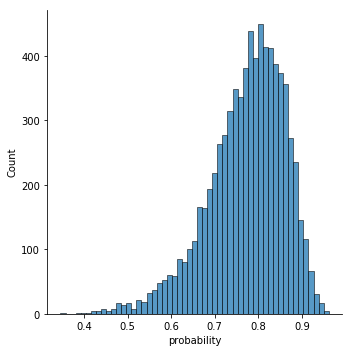

In [94]:
import seaborn as sns
df_proba_sample_c = df_proba_sample[df_proba_sample['Sample'] == 'TNE0009']
sns.displot(data =  df_proba_sample_c , x='probability')

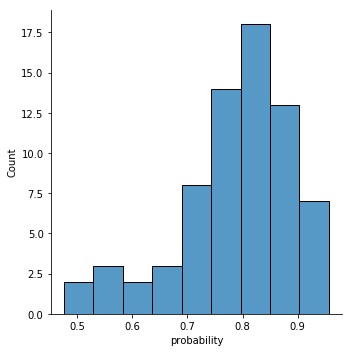

In [96]:
import seaborn as sns
df_proba_sample_c = df_proba_sample[df_proba_sample['Sample'] == 'TNE1084']
sns.displot(data =  df_proba_sample_c , x='probability')

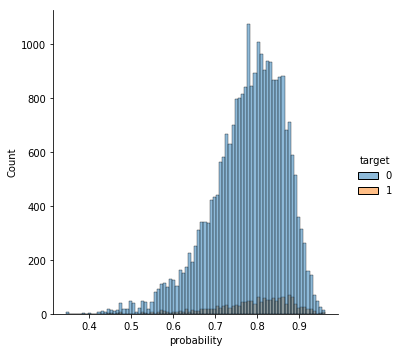

In [97]:
sns.displot(data =  df_proba_sample , x='probability', hue= 'target')

In [9]:
df_proba_sample_c.head()

,Sample,Tiles,target,probability
0,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.308092
1,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.354153
2,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.337643
3,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.268066
4,TNE1095,/data/gcs/lungNENomics/work/MathianE/Tiles_512...,0,0.346144


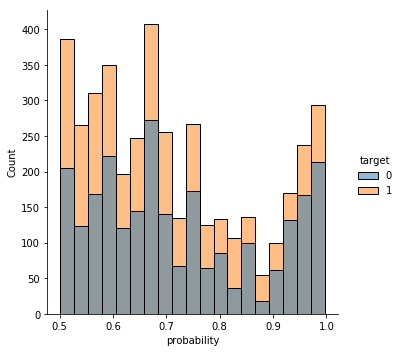

In [16]:
import seaborn as sns
df_proba_sample_p = df_proba_sample[df_proba_sample['probability'] > .5]
sns.displot(data =  df_proba_sample_p , x='probability', hue = 'target')